## **MeerKLASS-SSINS Project**

The following notebook serves as a summary of the progress made to date in the MeerKLASS Radio Frequency Interference (RFI) detection project using the SSINS (Sky-Subtracted Incoherent Noise Spectra) framework.


The notebook evalutes and compares the various sky-subtraction methods that we have developed to date.  In this notebook we will evalute wether the sky removal methods has sufficiently removed the astrophysical sky from our data, we will also perform statistical checks on the residual data, this will allow us to understand the distribution of the residual data.  The comparison checks of the SSINS methodology in this notebook is done on data from observation block 1630519596. 



### **Table of Contents**
* [SSINS: Radio Frequency Interference (RFI) Flagging Software ](#SSINS)
    * [Sky- Subtraction Method : ABBA](#section_1_1)
    *  [Sky-Subtraction Method : 2 Channel Dithering](#section_1_2)
    * [Incoherent Noise Spectrum](#section_1_3)
  
    * [Z Score Distribution](#section_1_4)
    
        


#### **1. SSINS: Radio Frequency Interference (RFI) Flagging Software** <a class="anchor" id="SSINS"></a>

**SSINS** (**S**ky-**S**ubtracted **I**ncoherent **N**oise **S**pectra) is an RFI flagging software that was developed for the MWA (Murchison Widefield Array) Radio Interferometer. The software was created such that the SSINS algorithmn can be suitably adjusted and applied to any other radio telescope, on a premise that your goal is to address the challenge of detecting and removing faint RFI in radio telescope observations. Faint RFI lies below the single baseline sensitivity of an array and in the case of single-dish observing systems faint RFI will lie below the noise measurement of the dish. Due to magnitude level of fainter RFI these conaminants often go undetected by standard RFI Flaggers, such as AOFlagger. 

In this work we will apply the SSINS algorithm to MeerKLASS 2021 L-band data, in particular the raw, time-ordered autocorrelation data. The first level of data reduction in the meerklass pipeline involves the flagging of strong RFI spikes in the data at the raw time ordered data level. The first round of flagging uses SEEK (Signal Extraction and Emission Kartographer), which is an RFI flagging software. The SEEK RFI flagger is based of the tresholding algorithm. The raw time ordered data is broken up into 6 groups and the flagger is applied to each group seperately in 2 steps, the first step the flagger is applied to the entire frequncy range of the data to flag the strong RFI from statelite and communications and the second flagging process is applied to the science targert freqeuency bands only. 
Our current analysis steps invloves applying the  SSINS methods after the flagging of strong RFI, i.e we apply the algorithm to the raw data with level 1 masks applied on the data,  this is done becasue strong RFI will result in the skewing of the data mean and the residual data distribution, and will affect the iterative flaggers ability to detect weaker RFI emissions. 

We apply the following stages of the SSINS Algorithm to the data:

1. **S**ky-Subraction
   
*  ABBA (4 Neighbouring Time Channel Differencing)
* 2 Neighbouring Time Channel Differencing
   
3. **IN**coherent Averaging
   
5. Mean Subraction (z-score calculation)



In [2]:
import os
import sys
sys.path.append(os.path.abspath('.'))
import mkssins
from mkssins import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In the next cell we define the observation block and path to the specific level masks we are working with. In this case we using observation block : 1630519596 and Level 1 masks for the data.

In [3]:
fname = '1630519596' 
path = '/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/'
pol = 'h'

In [4]:
#just checking the mkssins.py module

ants = mkssins.ants_checked_L1(fname, path)
for ant in ants:
    print(ant)
 

['m000']
['m001']
['m002']
['m003']
['m004']
['m005']
['m006']
['m007']
['m008']
['m009']
['m010']
['m011']
['m012']
['m013']
['m014']
['m015']
['m016']
['m017']
['m018']
['m019']
['m020']
['m021']
['m023']
['m024']
['m025']
['m027']
['m029']
['m030']
['m031']
['m032']
['m033']
['m035']
['m036']
['m037']
['m038']
['m039']
['m040']
['m041']
['m042']
['m043']
['m044']
['m045']
['m046']
['m047']
['m048']
['m049']
['m050']
['m051']
['m052']
['m053']
['m054']
['m055']
['m056']
['m057']
['m058']
['m059']
['m061']
['m062']
['m063']


 In the nest cell we  will loop over the ants in the list of antennas with masks and access the visData function from mkssins.py, we are storing the visibility products and the noise_diodes as seperate dictionaries, with 'ant' being the key for the values in the respective dictionaries. Also note we can add flags (SARAO Prior flags as well using the same approach)


In [5]:
%time

raw_vis_dict = {}
nd_flags_dict ={}

for ant in ants:
    vis,nd_s0 = mkssins.visData(fname, ant[0] , pol) # replace ant[0] and remove loop for extracting the antenna as a string from the list
    raw_vis_dict[ant[0]] = vis
    nd_flags_dict[ant[0]] = nd_s0
    
    

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 16.2 µs


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m000h' 'm000h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m001h' 'm001h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m002h' 'm002h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m003h' 'm003h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m004h' 'm004h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m005h' 'm005h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m006h' 'm006h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m007h' 'm007h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m008h' 'm008h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m009h' 'm009h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m010h' 'm010h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m011h' 'm011h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m012h' 'm012h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m013h' 'm013h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m014h' 'm014h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m015h' 'm015h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m016h' 'm016h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m017h' 'm017h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m018h' 'm018h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m019h' 'm019h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m020h' 'm020h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m021h' 'm021h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m023h' 'm023h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m024h' 'm024h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m025h' 'm025h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m027h' 'm027h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m029h' 'm029h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m030h' 'm030h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m031h' 'm031h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m032h' 'm032h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m033h' 'm033h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m035h' 'm035h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m036h' 'm036h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m037h' 'm037h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m038h' 'm038h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m039h' 'm039h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m040h' 'm040h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m041h' 'm041h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m042h' 'm042h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m043h' 'm043h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m044h' 'm044h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m045h' 'm045h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m046h' 'm046h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m047h' 'm047h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m048h' 'm048h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m049h' 'm049h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m050h' 'm050h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m051h' 'm051h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m052h' 'm052h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m053h' 'm053h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m054h' 'm054h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m055h' 'm055h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m056h' 'm056h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m057h' 'm057h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m058h' 'm058h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m059h' 'm059h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m061h' 'm061h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m062h' 'm062h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m063h' 'm063h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


In [ ]:
raw_vis_dict.keys()  #checking the  raw vis  dictionary

In [11]:
nd_flags_dict.keys() #checking the noise diode flags  dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

 Similary in the next cell we can create a dictionary for the mask of the flags from the Level 1 folder. We use the try/except method to check for _mask2 / _mask flag masks for each receiver.

In [14]:

l1_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/')
for dish, (vis) in raw_vis_dict.items():
    
    try:
        with open(mask_dir / f'{fname}_{dish}_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print (f'mask2 loaded for dish {dish}')
    except(Exception):
        with open(mask_dir / f'{fname}_{dish}_mask', 'rb')as f:
            d3 = pickle.load(f)
            print (f'mask loaded for dish {dish}')
    mask_flags=d3['mask']
    l1_flags_dict[dish]  = mask_flags
    
        
   
    #print(dish)

mask loaded for dish m000
mask loaded for dish m001
mask2 loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask2 loaded for dish m006
mask loaded for dish m007
mask2 loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
mask2 loaded for dish m013
mask loaded for dish m014
mask2 loaded for dish m015
mask loaded for dish m016
mask2 loaded for dish m017
mask2 loaded for dish m018
mask2 loaded for dish m019
mask2 loaded for dish m020
mask loaded for dish m021
mask2 loaded for dish m023
mask loaded for dish m024
mask loaded for dish m025
mask2 loaded for dish m027
mask2 loaded for dish m029
mask loaded for dish m030
mask2 loaded for dish m031
mask loaded for dish m032
mask loaded for dish m033
mask2 loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask2 loaded for dish m039
mask loaded for dish m040
mask loaded for dish m0

In [15]:
l1_flags_dict.keys() #checking level1 flags dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [16]:
from collections import defaultdict #stackexchange suggestion

d1 = l1_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict

dd = defaultdict(list)

for d in (d1, d2, d3): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[366.29751587,  62.51673126,  62.47373581, ...,   0.        ,
          0.        ,   0.        ],
       [378.96554565,  73.60748291,  73.96704102, ...,  87.94789124,
         88.41603851,  89.15293884],
       [366.03469849,  62.4033699 ,  62.65620041, ...,  78.47024536,
         79.04814911,  79.82781982],
       ...,
       [645.43511963,  71.5569458 ,  71.52669525, ...,  57.27457047,
         57.42282486,  58.23122787],
       [652.61529541,  72.38539886,  72.42293549, ...,  57.50582886,
         57.67279053,  58.55394745],
       [646.29705811,  71.72380829,  71.87686157, ...,  57.16184235,
 

In [10]:
dd.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [17]:
masked_vis_dict = {}

for dish, (mask_flags, vis , nd_s0) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0)
    masked_vis_dict[dish] = masked_vis

In [12]:
masked_vis_dict.keys()


dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [ ]:
for ant_value in masked_vis_dict.keys():
    print(ant_value)

#### Waterfall Panel of the Raw Visibilities

[<AxesSubplot:title={'center':'Raw Visibilities m000'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m001'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m002'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m003'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m004'}>]

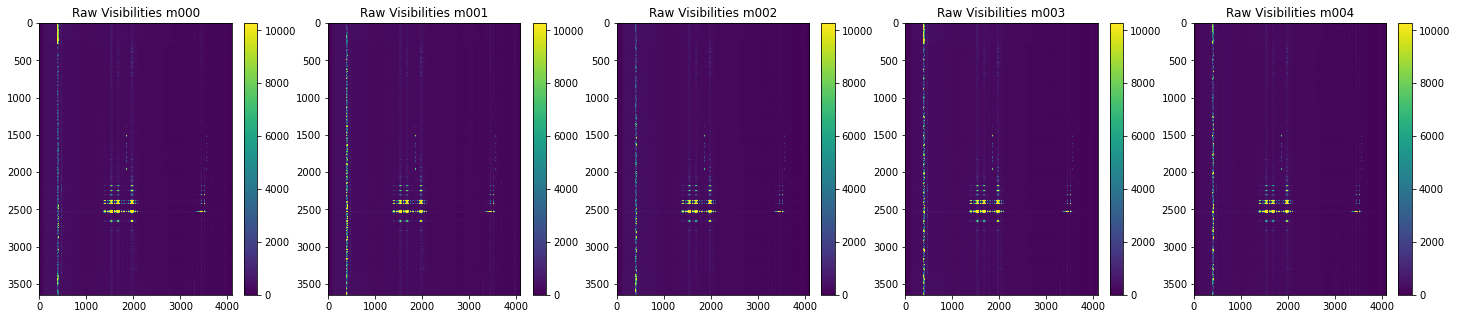

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(raw_vis_dict[ant_value], ax=ax, Title=f'Raw Visibilities {ant_value}', interpolation='nearest') for ant_value, ax in zip(raw_vis_dict, axes.flat) if ant_value in raw_vis_dict]

   

#### Waterfall Panel of the Raw Visibilities with Level 1 masks applied

[<AxesSubplot:title={'center':'vis+l1_flags m000'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m001'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m002'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m003'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m004'}>]

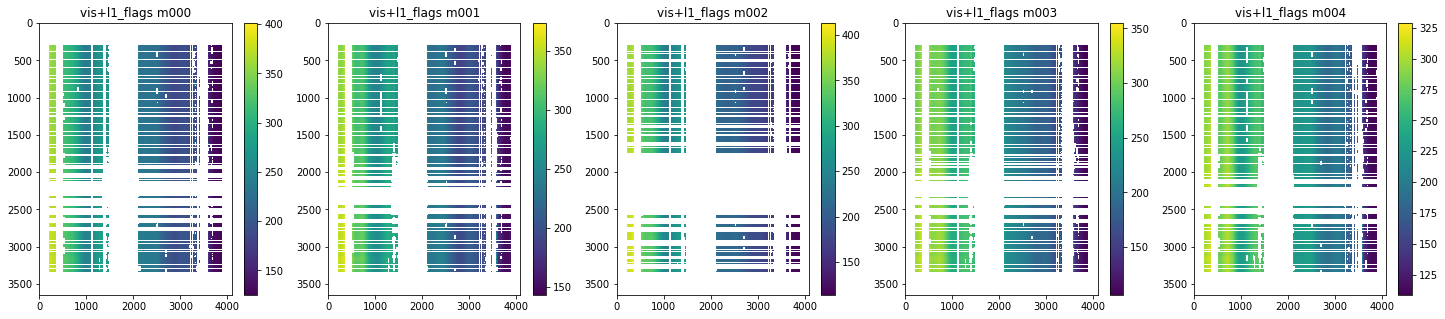

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(masked_vis_dict[ant_value].filled(), ax=ax, Title=f'vis+l1_flags {ant_value}', interpolation='nearest') for ant_value, ax in zip(masked_vis_dict, axes.flat) if ant_value in masked_vis_dict]

   

## **1.2. Sky-Sbtraction Method : ABBA**  <a class="anchor" id="section_1_2"></a>


Sky-Subtraction involves removing the bright astrophysical sky signal from observational data. This is done to promote sensitivity of the remaining/underlying signal of the data.By subtracting the bright sky signal we expect the residual components of the time ordered data to comprise of a slowly varying noise component and lowlying RFI. 



In this Section we will apply the ABBA method, which involves subtracting subsequent time-channels in the array, in this method our differencing is done over 4 channels in the TOD array.


In [31]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

stacked_visSS_abba = np.stack(list(abba_ss_dict.values()), axis=0)

In [32]:
SS_all_ants = stacked_visSS_abba
SS_all_ants[:, 1010, 3000]


array([ 0.10440063,  0.49749756, -0.53220367,  0.4420929 ,  0.50080109,
        0.08312225, -0.01454163, -0.02896118,  0.17352295, -0.11354828,
       -0.02719116,  0.07865906,  0.46146393, -0.2743988 ,  0.11555481,
       -0.04315948,  0.13052368,  0.66606903, -0.29734039,  0.09573364,
       -0.65789032,  0.30224609,  0.14155579, -0.0015564 ,  0.75337219,
        0.63674164, -0.3247757 , -0.2259903 , -0.11962891,  0.08015442,
       -0.65194702, -0.02781677, -0.18045044,  0.53178406,  0.35009766,
       -0.28968811, -0.16461945,  0.05205536,  0.39360046, -0.24506378,
       -0.57910156, -0.48080444,  0.23654175,  0.26628876, -1.05133057,
        0.50328827, -0.27108002, -0.71530151, -0.30319977, -0.43953705,
       -0.63311005, -0.27664948,  0.22093201, -0.25360107, -0.3024292 ,
        0.37387085, -0.42728424, -0.14286041,  0.08470917])

In [ ]:
fig, ax = plt.subplots(1, figsize=(24,12), dpi=150)
plt.plot(SS_all_ants[:, 1010, 3000], '.', markersize=12)
#plt.axhline(y=10, color='k')

plt.xticks(np.arange(len(ants)), [ant_value for ant in ants])
plt.xticks(fontsize=7, rotation=25)
plt.title('Sky-Subtractions of each antenna for a specific time and frequency channel')
plt.ylabel('SS Value')
plt.xlabel('Antenna')

 #this shows that the masked array Sky subs are now done as expected, we can see that for the four receivers there is a different sky-subtraction value


### Bandpass plots of the ABBA Sky-Subtraction for each Receiver

[<AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>]

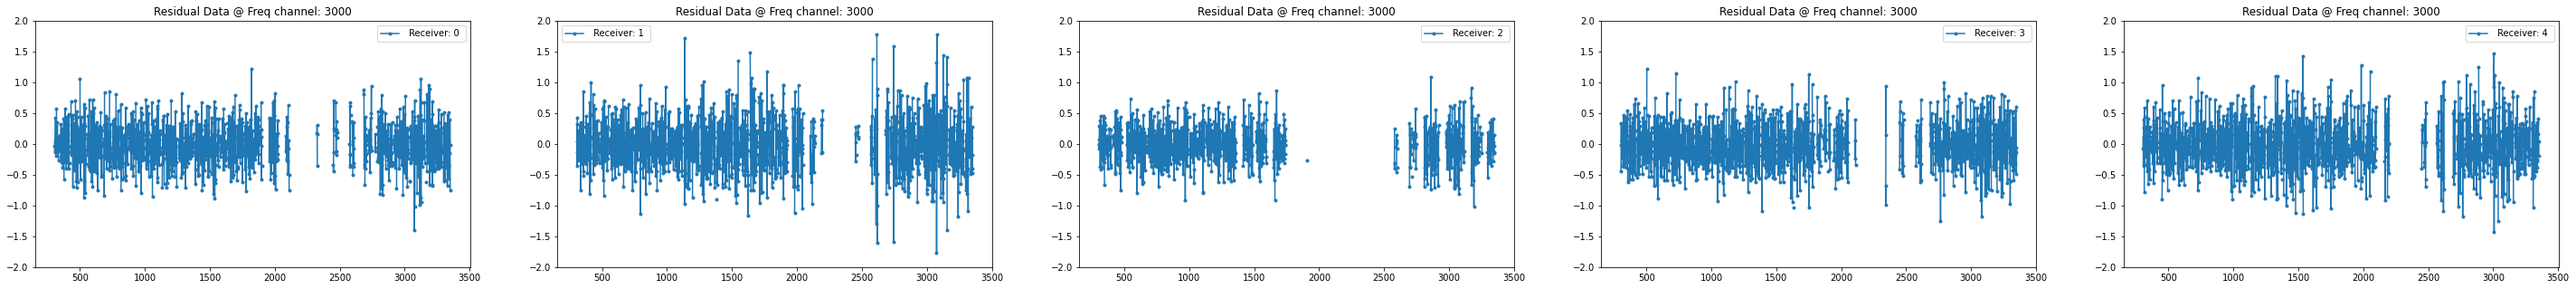

In [92]:
#Note this one is inspecting at one frequency channel (residual data plot)

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(SS_all_ants[i, :, 3000], ylim= (-2,2), label= f" Receiver: {i} ", Title='Residual Data @ Freq channel: 3000', ax=ax) for i, ax in zip(range(0, len(ant_trunc)), axes.flat)]

Bandpass plots for each receiver sky-subtraction, we want to check for the those strange spikes we see in the all antenna average, if its attributed to the averaging of the spectrums.

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice


[<AxesSubplot:title={'center':'Bandpass @ Receiver 0'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 1'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 2'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 3'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 4'}>]

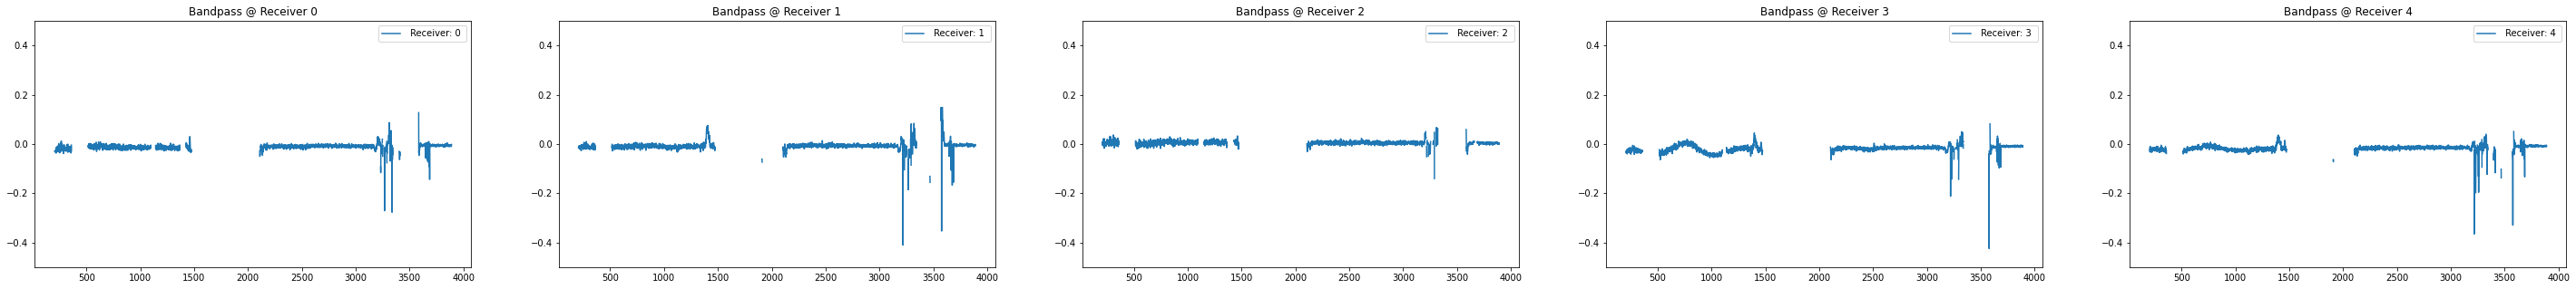

In [105]:
# Note this is the  ABBA SS Bandpass at each receiver
rows = 1 
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(np.nanmean(SS_all_ants[i, :, :], axis=0), ylim= (-0.5,0.5), label= f" Receiver: {i} ", Title= f'Bandpass @ Receiver {i}', ax=ax) for i, ax in zip(range(0, len(ants)), axes.flat)]



### Bandpass plot of the Antenna Averaged ABBA Sky-Subtraction (SSINS)


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Bandpass for SSINS'}>

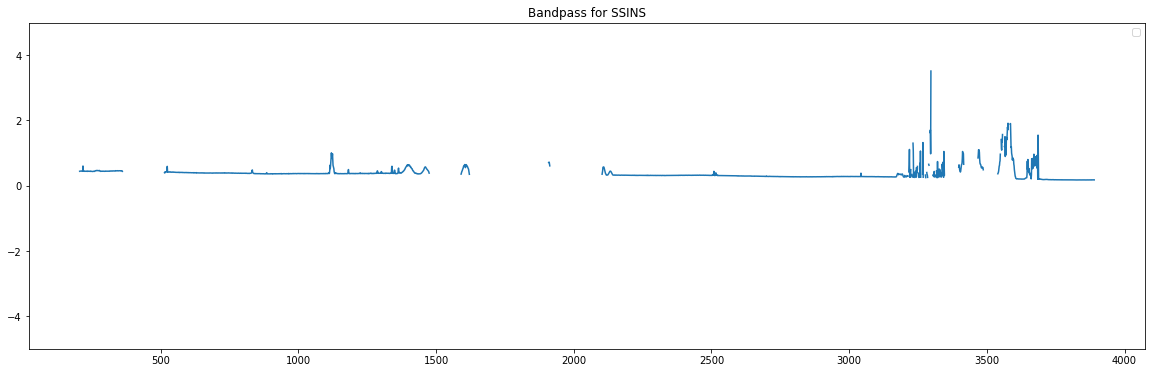

In [67]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

plot(np.nanmean(AbbaAllAnts[:, :], axis=0), ylim= (-5,5), Title= f'Bandpass for SSINS', linestyle= '-', marker='') 



### Waterfall plots of the ABBA Sky-Subtraction for each Receiver

[<AxesSubplot:title={'center':'abba ss m000'}>,
 <AxesSubplot:title={'center':'abba ss m001'}>,
 <AxesSubplot:title={'center':'abba ss m002'}>,
 <AxesSubplot:title={'center':'abba ss m003'}>,
 <AxesSubplot:title={'center':'abba ss m004'}>]

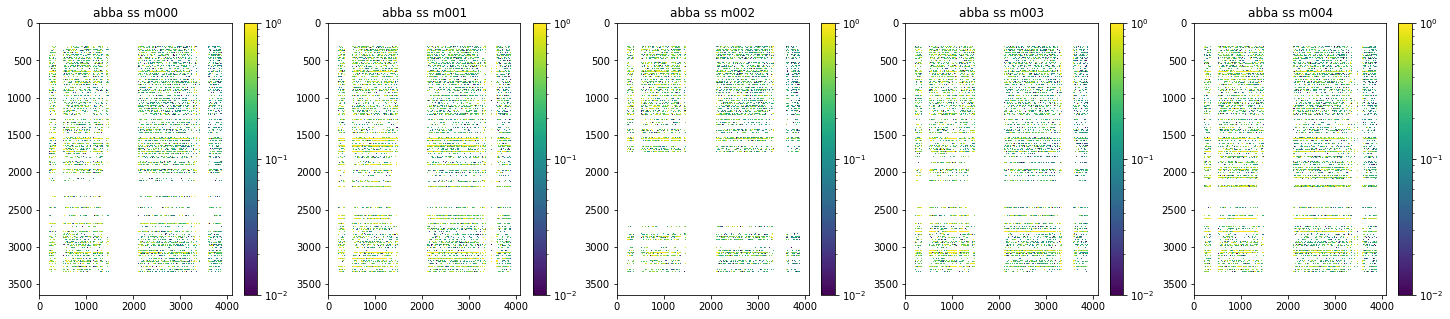

In [12]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=0.01, vmax=1)
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(abba_ss_dict[ant_value], ax=ax, Title=f'abba ss {ant_value}', interpolation='nearest', norm=norm) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]

   

### Waterfall plot of the ABBA Sky-Subtraction Antenna Averaged (SSINS)

This is a waterfall plot of the Sky-subtracted Incoherently Averaged Visibilities, with level 1 flags applied on the data. What is important to note is at this stage we can't at first or even deeper inspection see the presence of fainter RFI, The reason for this is we simply are required to boost the contrast between the distributions that are 'mixed' in this spectrum. At this stage the spectrum is a mixture distributon of noise (folded gaussian distributed amplitudes) and RFI (of which fainter RFI amplitudes lie below the noise of this spectrum). The next step of the SSINS algorithm will be standardising each data point (t,f) in this waterfall map effectively creating a z-score waterfall map, the data transformation will contrast the underlying RFI distribution against the noise amplitides distribution.

<AxesSubplot:title={'center':'ABBA Incoherent Averaged Spectrum'}, xlabel='Frequency Chan', ylabel='Time Chan'>

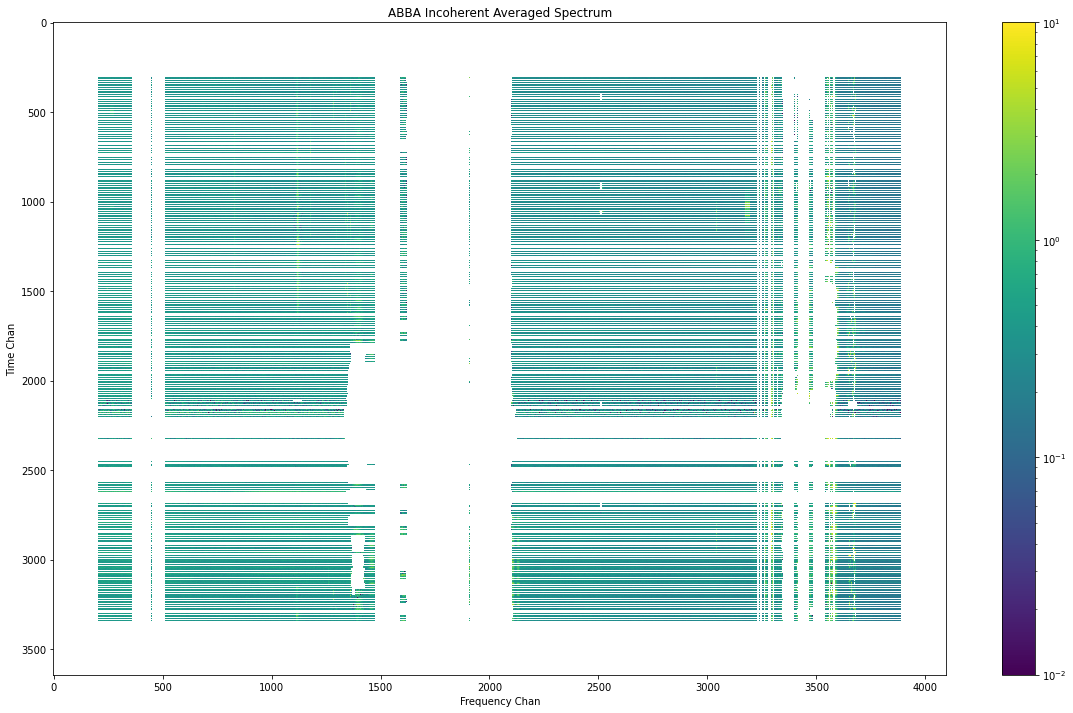

In [70]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_waterfall(AbbaAllAnts, interpolation='nearest', norm=norm, figsize=(20,12), Title= 'ABBA Incoherent Averaged Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

In [15]:
import katcali

In [14]:
data = katcali.io.load_data(fname)

In [15]:
ants = katcali.io.ant_list(data)

### RMS Statistics of the ABBA Sky-Subtractions

RMS Statistics of the sky-subtractions, to determine the level of noise reduction, the signal reduction should correspond to 1 over the square of the antennas we did the average over. I have done the RMS for all receivers, see a lot of differences. 

In [20]:
# RMS calculated over all receivers

rms_all_ants = np.sqrt(np.nanmean(AbbaAllAnts**2)/AbbaAllAnts.shape[0])
print(f'The RMS from averaging over all the receivers is:{rms_all_ants}') 


The RMS from averaging over all the receivers is:0.007806002375344335


In [21]:
# This is calculates the RMS at a receiver level for all frequency and time, the RMS over the SS spectrum

def rms(ss_data):
    N = ss_data.shape[0]
    rms_all = np.sqrt(np.nanmean((ss_data)**2)/N)
    return rms_all

In [22]:
# This calculates the RMS at a receiver for a particular frequency in a Sky Subtraction Spectrum

def rms_mu(ss_data, mu):
    
    N = ss_data.shape[0]
    rms_mu = np.sqrt(np.nanmean((ss_data[:,mu])**2)/N)
    
    return rms_mu

In [232]:
rms_mu(abba_vis, mu=3000)

0.00585032853761648

In [24]:
rms_reduced_expected = 1/(np.sqrt(len(ants)))
print(f'The Expected Reduced RMS from averaging over all the receivers is: {rms_reduced_expected}') #Theoretical Value we expect


The Expected Reduced RMS from averaging over all the receivers is: 0.12909944487358055


In [25]:
# Expected RMS Values for each receiver
rms_array_expected = []
for ant_value, (abba_vis) in abba_ss_dict.items():

    rms_val =  rms(abba_vis)
    d_rms = rms_val - rms_reduced_expected
    
    #print(f'RMS for reciever {ant_value}  is : {rms_val}')
    #The Expected RMS difference between the Receiver RMS and all antenna average RMS : {d_rms}')


In [26]:
# RMS for all Recievers ABBA Sky Subtraction
rms_array = []
for ant_value, (abba_vis) in abba_ss_dict.items():
    rms_value =  rms(abba_vis)
    rms_array.append(rms_value)
    d_rms = rms_value - rms_all_ants
    #print(f'RMS for reciever {ant_value}  is : {rms_value}, The difference between the Receiver RMS and all antenna average RMS : {d_rms}')
rms_array = np.array(rms_array)


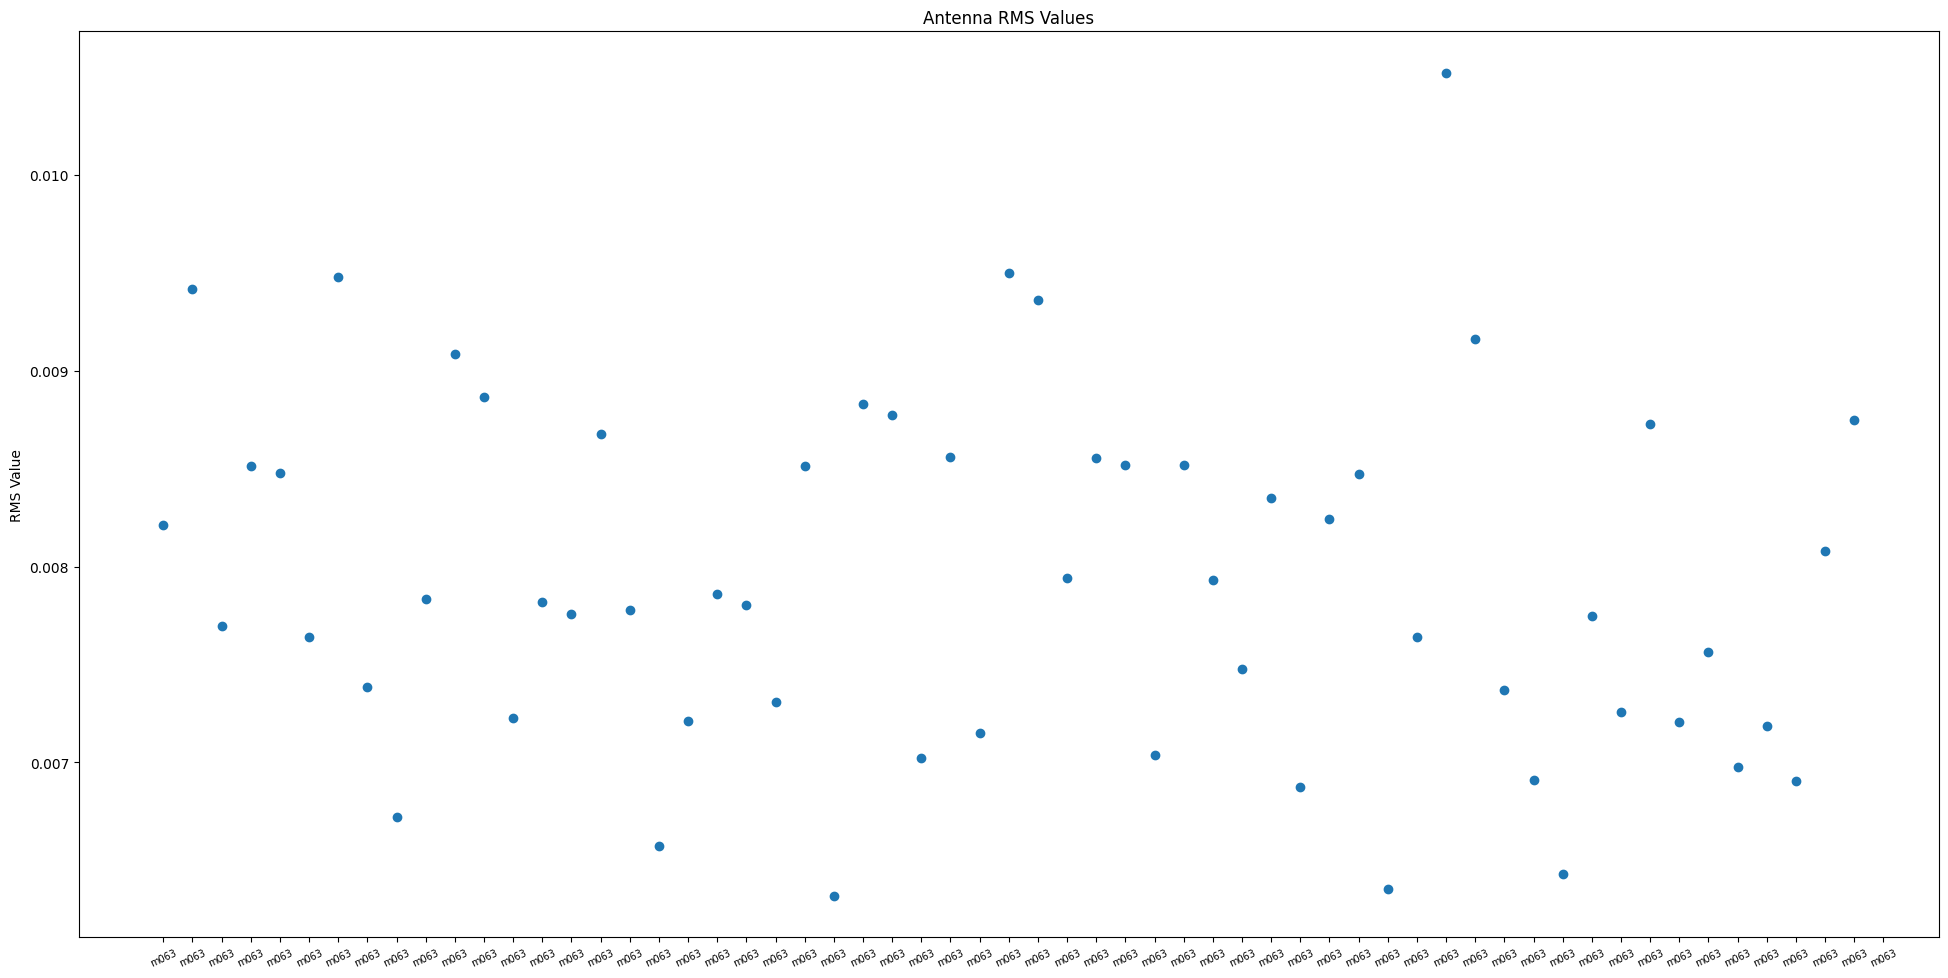

In [74]:
fig, ax = plt.subplots(1, figsize=(24,12), dpi=100)
plt.plot(rms_array, '.', markersize=12)
#plt.axhline(y=10, color='k')

plt.xticks(np.arange(len(ants)), [ant_value for ant in ants])
plt.xticks(fontsize=7, rotation=25)
plt.title('Antenna RMS Values')
plt.ylabel('RMS Value')

plt.show()

 #### RMS Result Discussion:

### Histogram plots of the ABBA Sky-Subtraction Waterfalls

[<AxesSubplot:title={'center':'Histogram for Residual data of Receiver m000'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m001'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m002'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m003'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m004'}>]

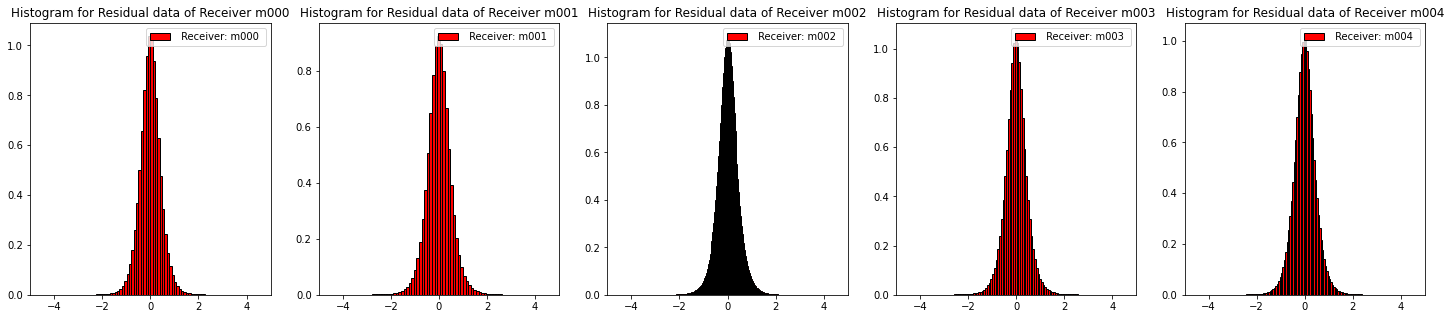

In [421]:
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_hist(np.ravel(abba_ss_dict[ant_value]),label= f" Receiver: {ant_value} ", Title=f'Histogram for Residual data of Receiver {ant_value}', bins=1000, xlim=(-5,5), ax=ax) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
    
   

### Histogram plots of the ABBA Antenna Averaged Sky-Subtraction Waterfalls (SSINS)


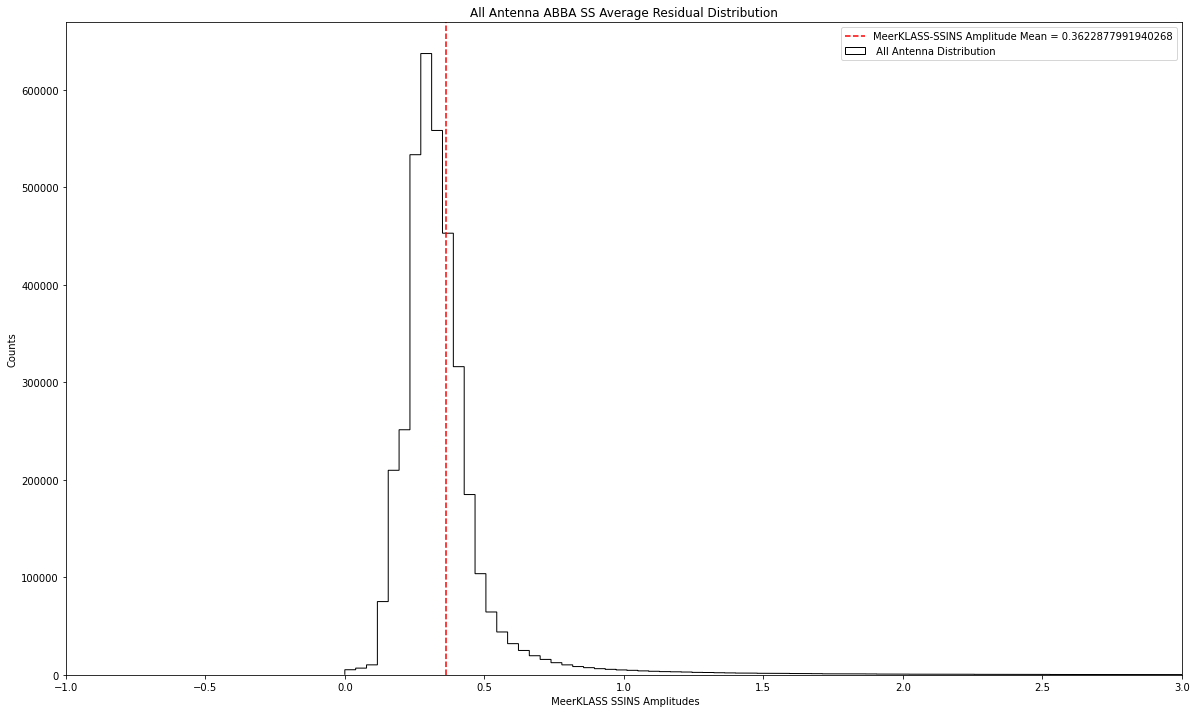

In [42]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(AbbaAllAnts),label= " All Antenna Distribution", Title=f'All Antenna ABBA SS Average Residual Distribution', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(mean, color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {mean}')
ax.legend()

plt.show()

In [34]:
mean = np.nanmean(AbbaAllAnts)

# Z- Score Calculation of the ABBA Incoherent Averaged Spectrum (SSINS)

In [76]:
def cal_zscore(SS_all_spectrums):

    """ This fuction calculates the z-scores.
    Parameters:
    ----------
    SS_all_spectrums: Array of all antenna sky subtraction spectrums, has the shape (no.Dishes, Time, Frequency)
    
    Returns:
    --------

    z_score: 2D array of the normalised Incoherent Spectrum.
    
    """
    
    IncoherentSpectrum = np.nanmean(np.abs(SS_all_spectrums), axis=0)
    no_dishes = SS_all_spectrums.shape[0]
    c_fold = np.pi / 2 - 1  #Auto C_fold Ratio
    meanEst = np.nanmean(IncoherentSpectrum, axis=0) #Time axis averaged MeanEstimate
    std_sq = c_fold*meanEst**2 
  
    z_score = ((IncoherentSpectrum-meanEst))/np.sqrt(std_sq/no_dishes*)
   
    
    return z_score  #returns 2D array of the z scores
    

In [51]:
z_score_map_abba = cal_zscore(SS_all_ants)
z_score_map_abba[3010:3050, 3001]

array([-0.96122782,         nan,         nan,         nan,         nan,
       -1.76194549, -1.4483216 , -0.40722976, -1.32063865, -0.41853075,
        0.31980659,         nan,         nan,         nan,         nan,
        0.42589906,  1.30892293, -0.78716767,  0.87060079,  0.24905068,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  0.93623924, 14.93942289,
               nan,         nan,         nan,         nan,  2.51749305,
        4.82618061,  1.54327554,  1.14266035, -0.44423013, -0.79627548])

In [19]:
min= np.nanmin(z_score_map_abba)
max = np.nanmax(z_score_map_abba)
mean =np.nanmean(z_score_map_abba)
median = np.nanmedian(z_score_map_abba)

print(f'z_score_map_abba minimum val is: {min}')
print(f'z_score_map_abba maximum val is: {max}')
print(f'z_score_map_abba mean val is: {mean}')
print(f'z_score_map_abba median val is: {median}')
print(f'z_score_map_abba range val is: {max-min}')

z_score_map_abba minimum val is: -10.166826704491546
z_score_map_abba maximum val is: 470.1916270337498
z_score_map_abba mean val is: -8.43242617399089e-18
z_score_map_abba median val is: -0.5860721165451335
z_score_map_abba range val is: 480.35845373824134


# Z-Score Waterfall : MeerKLASS-SSINS  Level 1
The z-score is a statistical relationship that describes the distribution, i.e deviation  of  data points from the mean value of the data. Mean Subtract  The idea is to transform the mixture distribution into a guassian like distribution, by    
In this z-score map of we have plotted the data using a discrete colobar, this is done to simply the visualisation of data points that lie at higher/lower deviations from the mean value of the data z-score.

<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

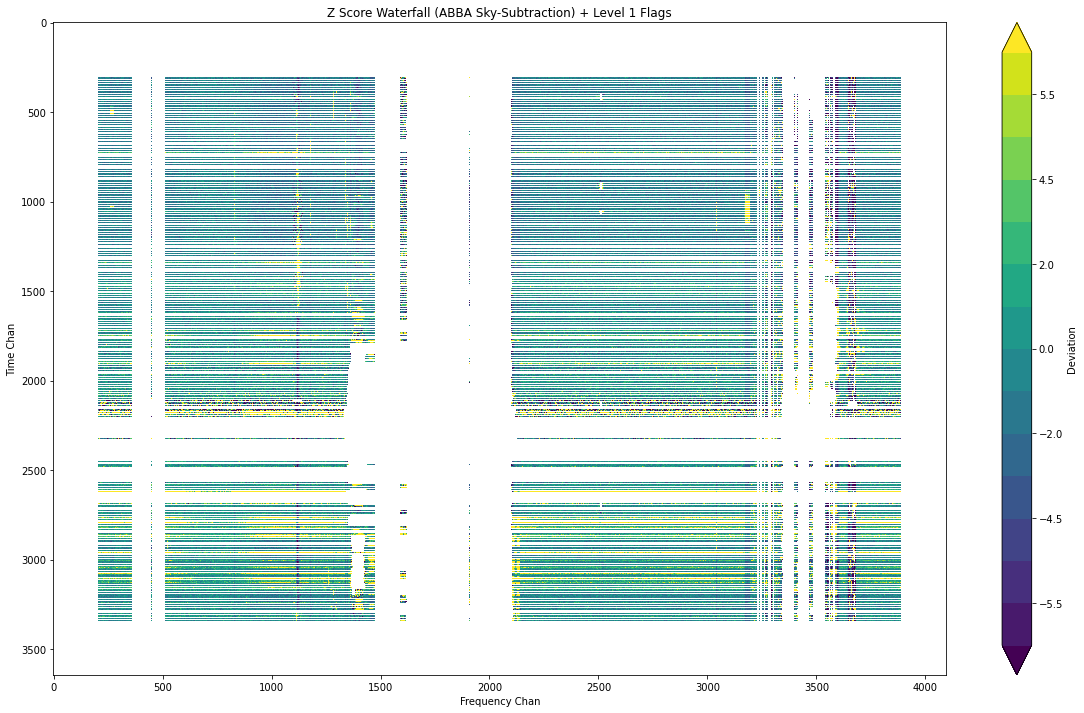

In [49]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(z_score_map_abba, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

In [64]:
l4_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level4/mask/')
for dish, (vis) in raw_vis_dict.items():
    try:
        with open(mask_dir / f'{fname}_{dish}_level4_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print(d3.keys())
    except(Exception):
        try:
            with open(mask_dir / f'{fname}_{dish}_level4_mask', 'rb') as f:
                d3 = pickle.load(f)
                print(f'mask loaded for dish {dish}')
    
        except FileNotFoundError:
            print(f'No mask file found for dish {dish}')
            
    mask_flags=d3['Inten_mask']
    l4_flags_dict[dish]  = mask_flags


mask loaded for dish m000
mask loaded for dish m001
mask loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask loaded for dish m006
No mask file found for dish m007
mask loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
No mask file found for dish m013
No mask file found for dish m014
mask loaded for dish m015
mask loaded for dish m016
mask loaded for dish m017
mask loaded for dish m018
mask loaded for dish m019
mask loaded for dish m020
mask loaded for dish m021
mask loaded for dish m023
No mask file found for dish m024
mask loaded for dish m025
mask loaded for dish m027
mask loaded for dish m029
mask loaded for dish m030
mask loaded for dish m031
mask loaded for dish m032
No mask file found for dish m033
mask loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask loaded for dish m039
mask loaded for dish m040
mas

In [65]:
from collections import defaultdict #stackexchange suggestion

d1 = l4_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict

dd = defaultdict(list)

for d in (d1, d2, d3): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[366.29751587,  62.51673126,  62.47373581, ...,   0.        ,
          0.        ,   0.        ],
       [378.96554565,  73.60748291,  73.96704102, ...,  87.94789124,
         88.41603851,  89.15293884],
       [366.03469849,  62.4033699 ,  62.65620041, ...,  78.47024536,
         79.04814911,  79.82781982],
       ...,
       [645.43511963,  71.5569458 ,  71.52669525, ...,  57.27457047,
         57.42282486,  58.23122787],
       [652.61529541,  72.38539886,  72.42293549, ...,  57.50582886,
         57.67279053,  58.55394745],
       [646.29705811,  71.72380829,  71.87686157, ...,  57.16184235,
 

In [55]:
masked_vis_dict = {}

for dish, (mask_flags, vis , nd_s0) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0)
    masked_vis_dict[dish] = masked_vis

In [56]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

stacked_visSS_abba = np.stack(list(abba_ss_dict.values()), axis=0)

In [57]:
SSINS_l4 = stacked_visSS_abba


In [58]:
zscore_l4 = cal_zscore(SSINS_l4)


<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Mask'}, xlabel='Frequency Chan', ylabel='Time Chan'>

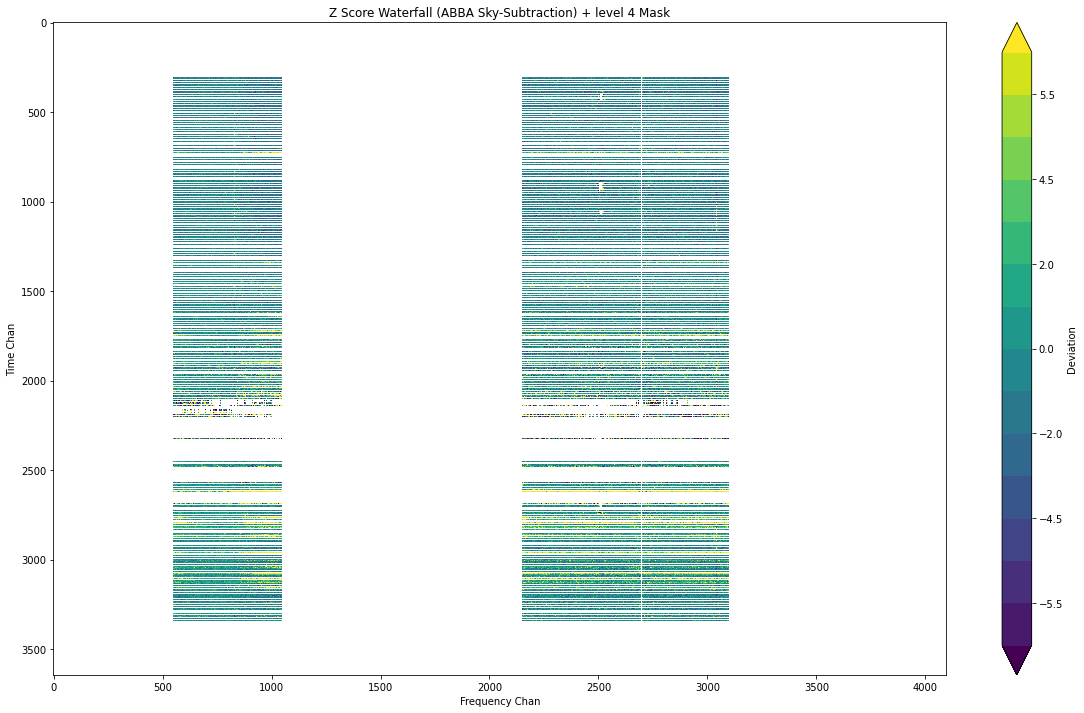

In [60]:
bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation' )

In [67]:
vis_data = raw_vis_dict['m000']
mask_l4 = l4_flags_dict['m000']

l4_masked_data = np.ma.masked_array(vis_data, mask=mask_l4, fill_value = np.nan)

In [73]:
print(f'Z map data shape:{z_score_map_abba.shape}')
print(f'L4 mask data shape:{mask_l4.shape}')

#Shapes of the z map and mask_l4 are different, i have reshaped the masked_l4 array to match the z map data

Z map data shape:(3644, 4096)
L4 mask data shape:(3647, 4096)


In [74]:
z_data_shape = z_score_map_abba.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [75]:
z_map_abba_l4_masked = np.ma.masked_array(z_score_map_abba, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

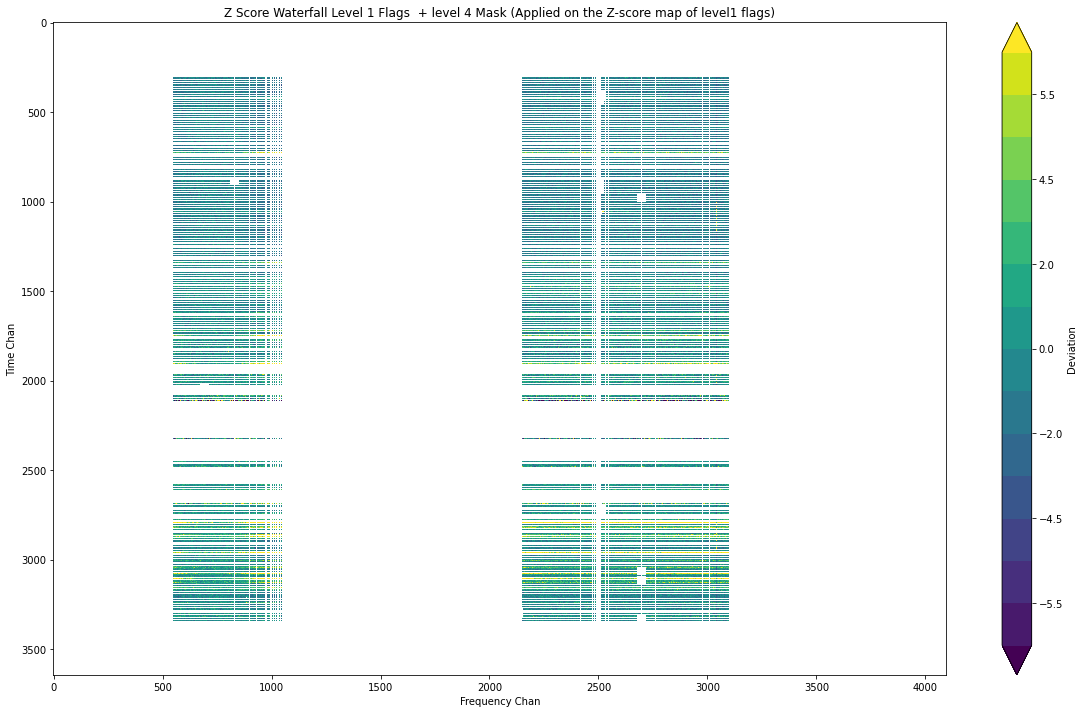

In [65]:
bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_map_abba_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation' )

### Z-Score Distribution

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Z-Score Histogram Level 1'}, xlabel='Deviation', ylabel='Counts'>

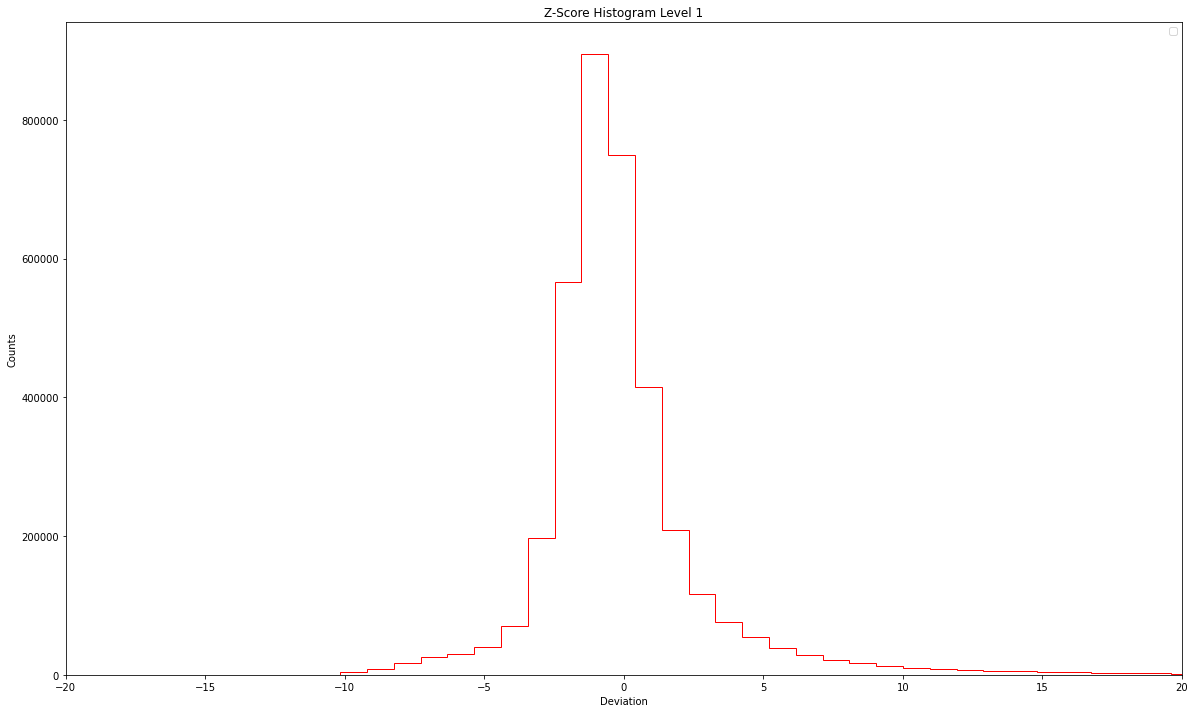

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_abba), Title='Z-Score Histogram Level 1', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


No handles with labels found to put in legend.


(-12.0, 15.0)

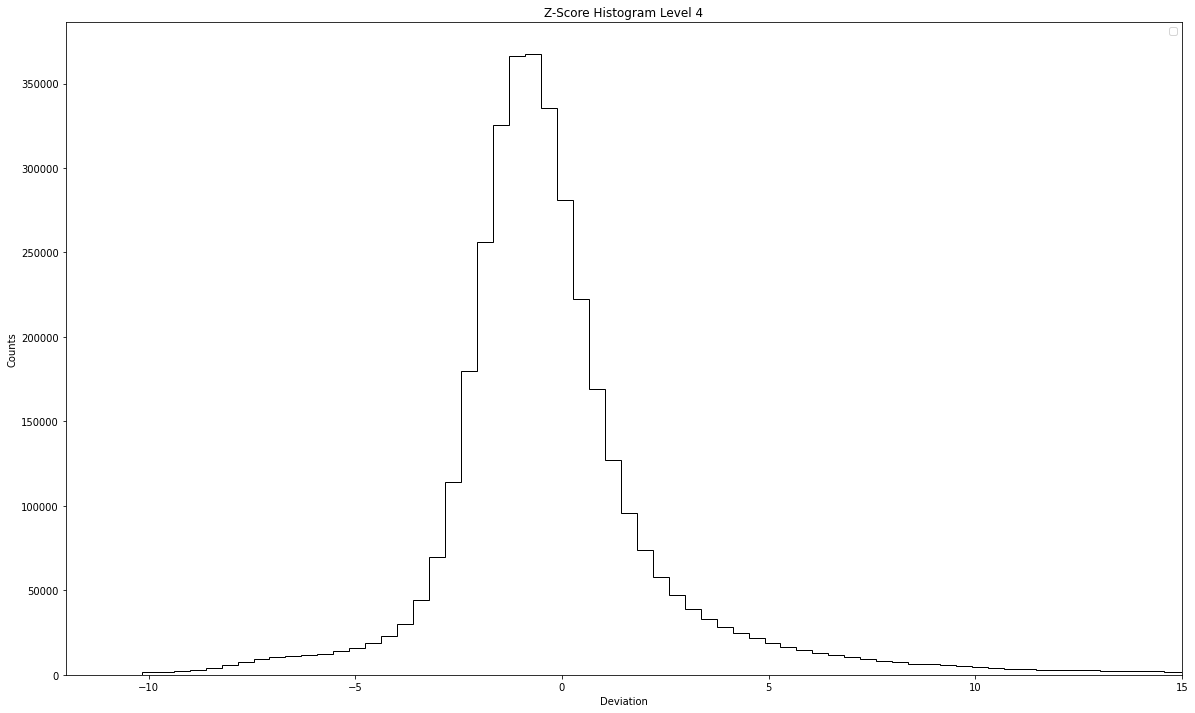

In [65]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(20, 12))


plot_hist(np.ravel(z_map_abba_l4_masked), Title=f'Z-Score Histogram Level 4', bins=500, xlim=(-10, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
#ax.plot(bin_edges[:-1], model_y)
ax.set_xlim(-12,15)
#ax.set_ylim([np.amin(counts[counts > 0])*1e-3, np.amax(counts)]*1e-3)
    

<AxesSubplot:xlabel='Deviation', ylabel='Counts'>

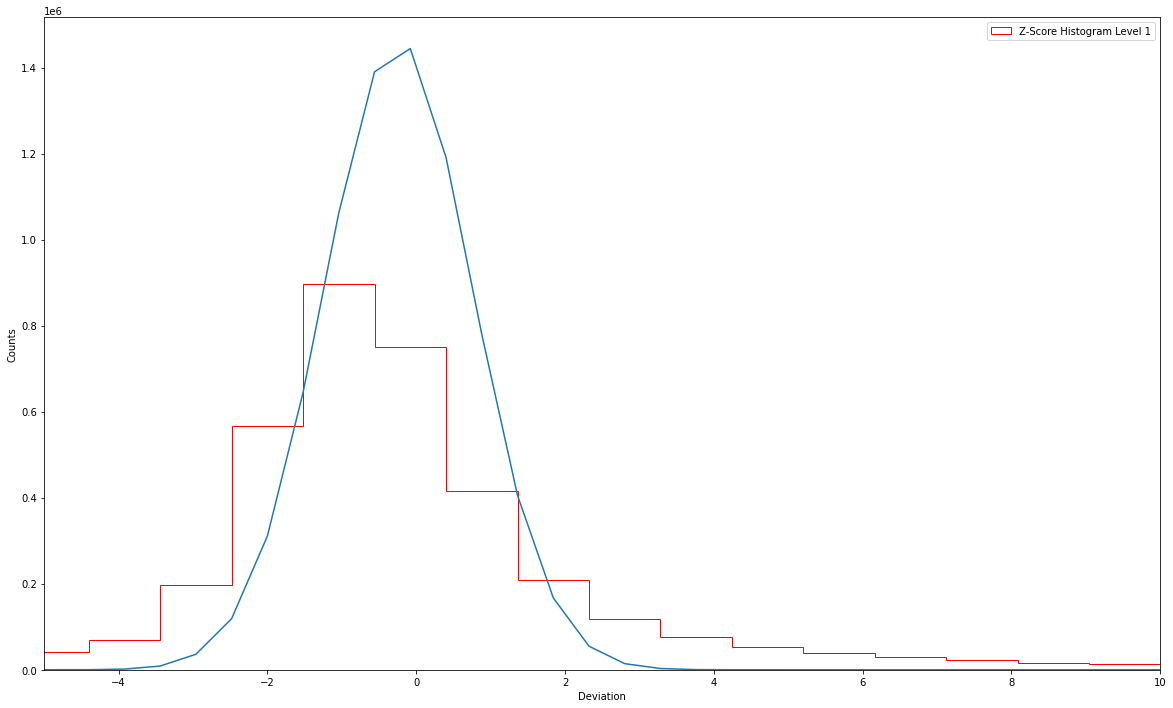

In [18]:

data = np.ravel(z_score_map_abba)

data1 = data[~np.isnan(data)]

counts, bin_edges = np.histogram(data1, bins=1000, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values


model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
# or maybe
#model_y = model_y*np.sum(counts)


fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(bin_edges[:-1], model_y)
plot_hist(np.ravel(z_score_map_abba), label='Z-Score Histogram Level 1', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


In [ ]:
data = np.ravel(z_map_abba_l4_masked)



counts, bin_edges = np.histogram(data, bins=bins, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values
model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
#model_y = model_y*np.sum(counts)

# Sky-Subtraction Method : 2 Channel Dithering

In [18]:
#After the masking of the data and the flags we apply the sky-subtraction function
SS_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    SS_data = SkySubtraction(masked_vis)
    SS_dict[ant_value] = SS_data


In [19]:
SS_dict.items()

dict_items([('m000', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m001', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m002', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m003', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,

In [20]:
ss_vis = np.stack(list(SS_dict.values()), axis=0)

In [21]:
ss_vis_AllAntsAve = np.nanmean(np.abs(ss_vis[:,:,:]), axis=0)


In [22]:
ss_vis_AllAntsAve.shape

(3646, 4096)

<AxesSubplot:title={'center':'2 channel Differencing SS Incoherent Averaged Spectrum'}, xlabel='Frequency Chan', ylabel='Time Chan'>

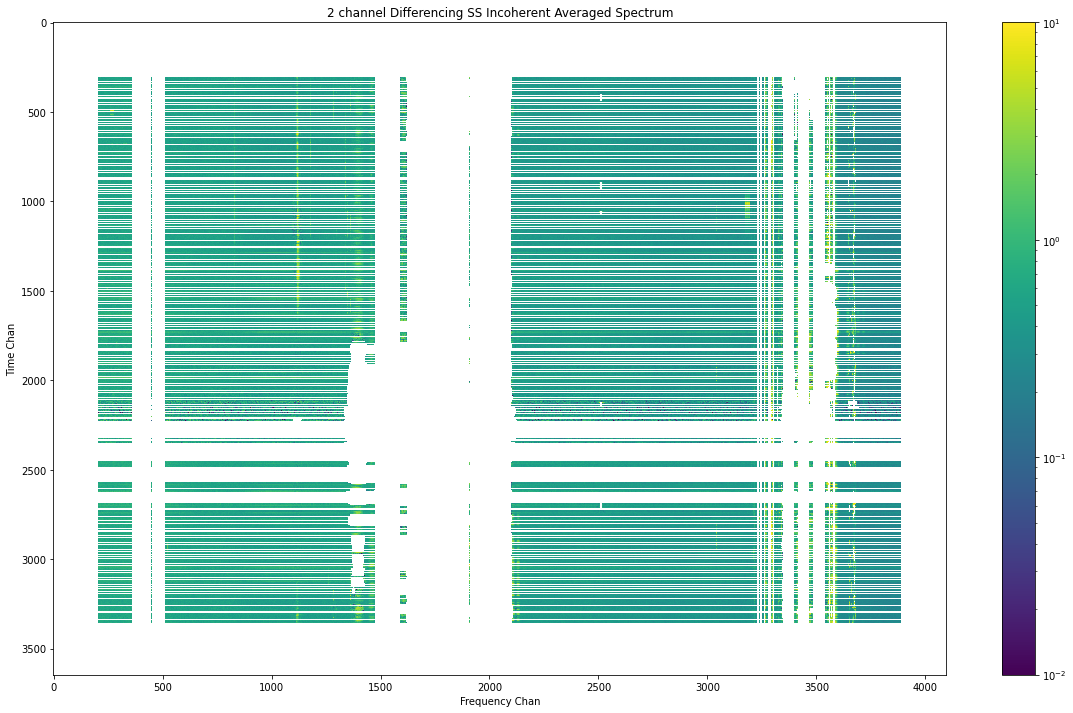

In [24]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

plot_waterfall(ss_vis_AllAntsAve, interpolation='nearest', norm=norm, figsize=(20,12), Title= '2 channel Differencing SS Incoherent Averaged Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

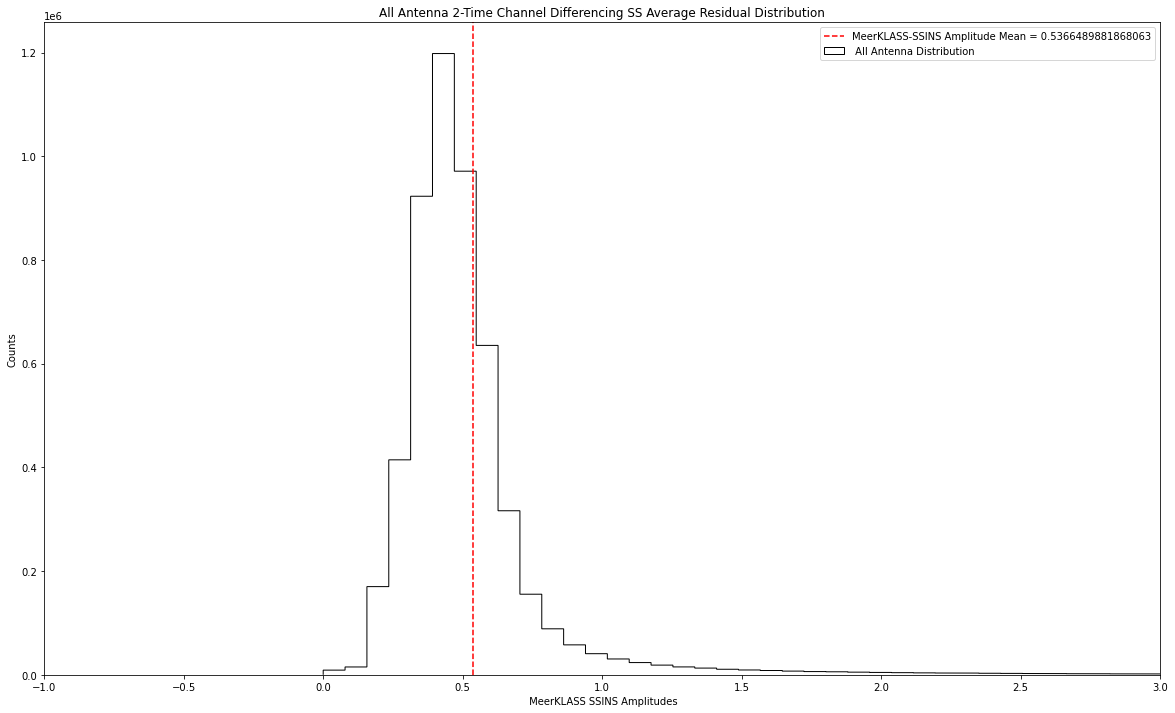

In [29]:


fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(ss_vis_AllAntsAve),label= " All Antenna Distribution", Title=f'All Antenna 2-Time Channel Differencing SS Average Residual Distribution', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {np.nanmean(ss_vis_AllAntsAve)}')
ax.legend()

plt.show()

In [48]:
z_score_map_ss = cal_zscore(ss_vis)

<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction)'}>

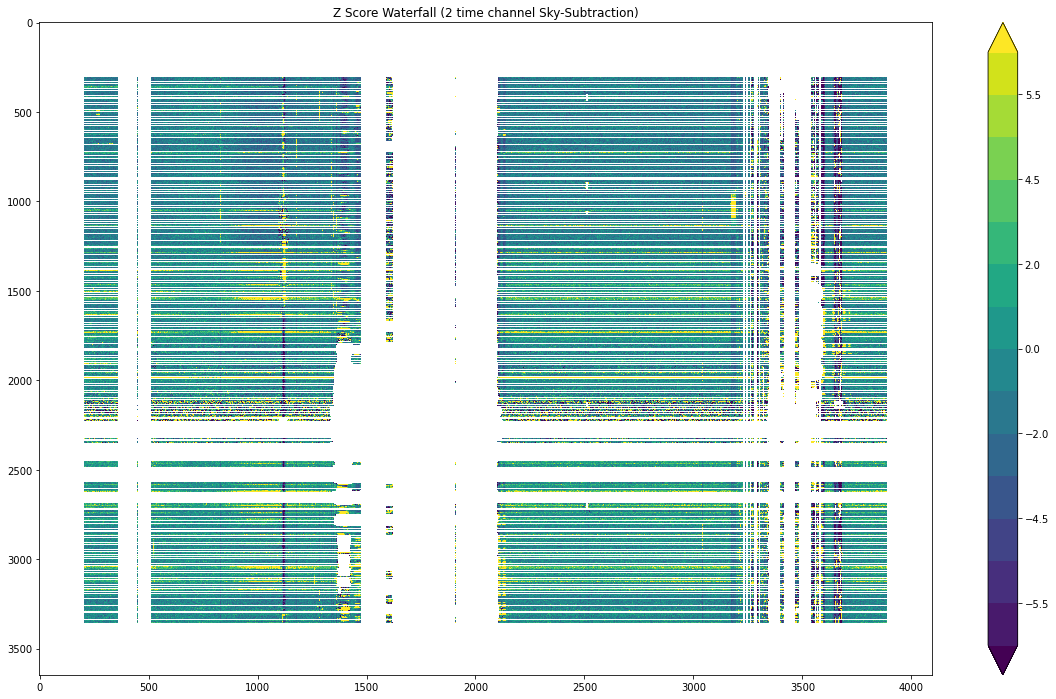

In [49]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_score_map_ss, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction)', figsize=(20,12) )

In [68]:
z_data_shape = z_score_map_ss.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [69]:
z_map_ss_l4_masked = np.ma.masked_array(z_score_map_ss, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask, applied on the level 1 Z-score map'}>

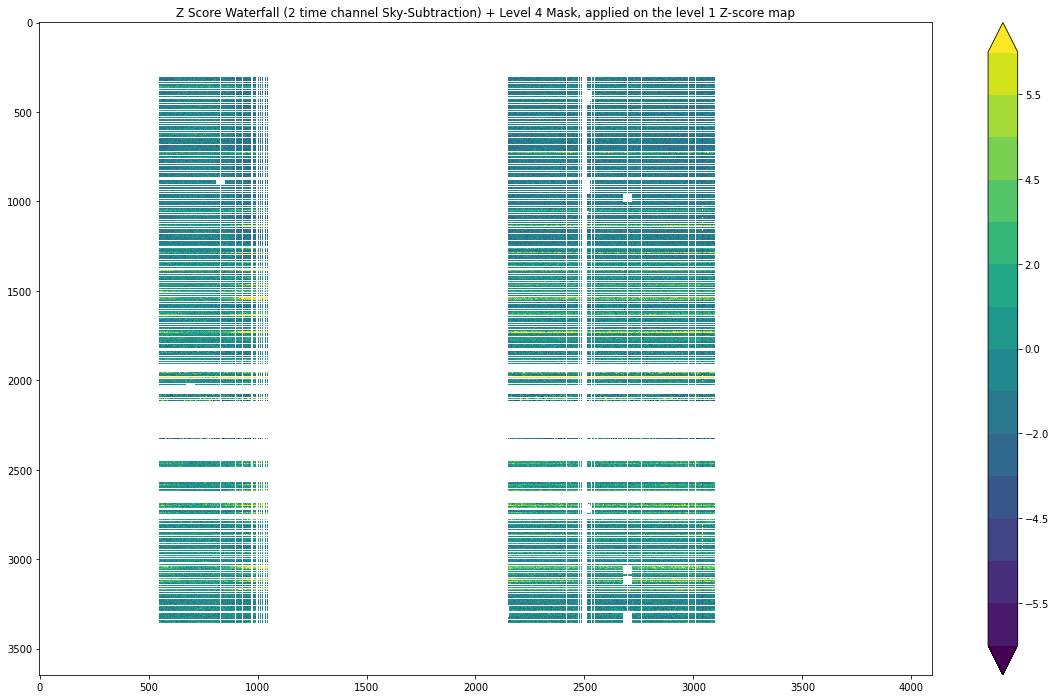

In [71]:

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_map_ss_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask, applied on the level 1 Z-score map', figsize=(20,12) )

In [41]:
l4_flags_dict.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

### Comparision plots of the sky subtacion with lower level flags

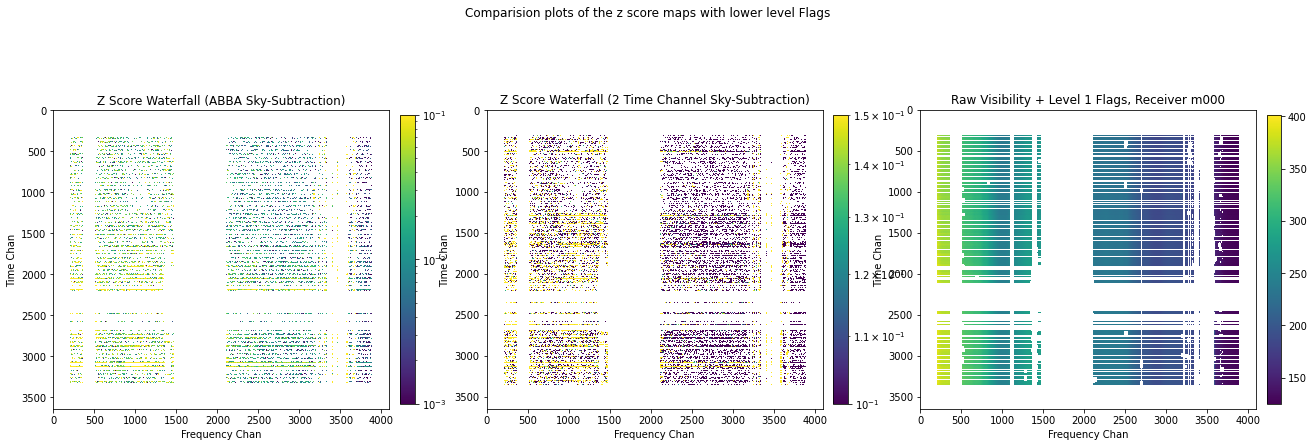

In [154]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-3, vmax=1e-1)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 = axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=LogNorm(vmin=1e-1, vmax=1.5e-1))
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(masked_vis_dict['m000'].filled(), interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 1 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')


fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')

plt.show()

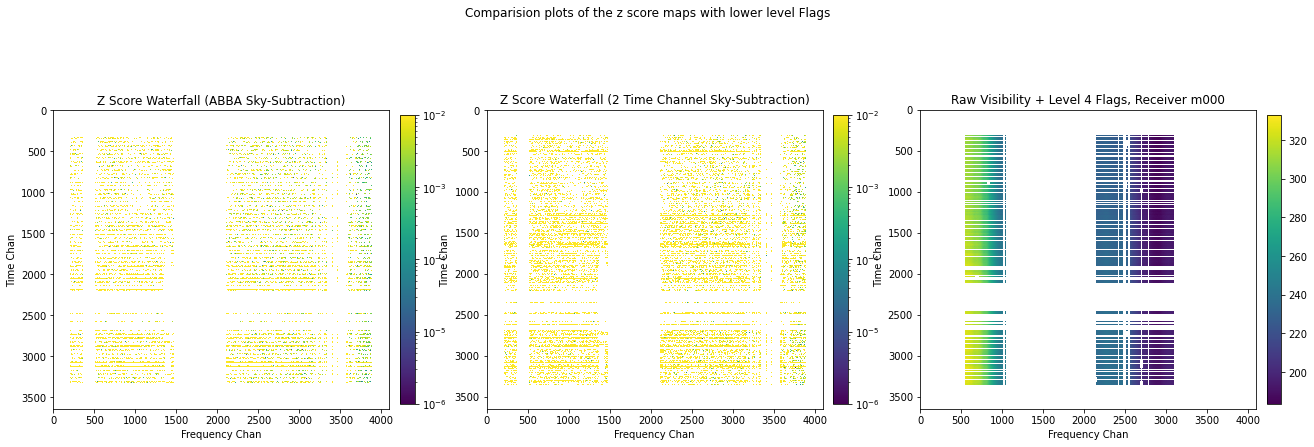

In [133]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-6, vmax=1e-2)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 =axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=norm )
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(l4_masked_data, interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 4 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')

 
fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')
plt.show()

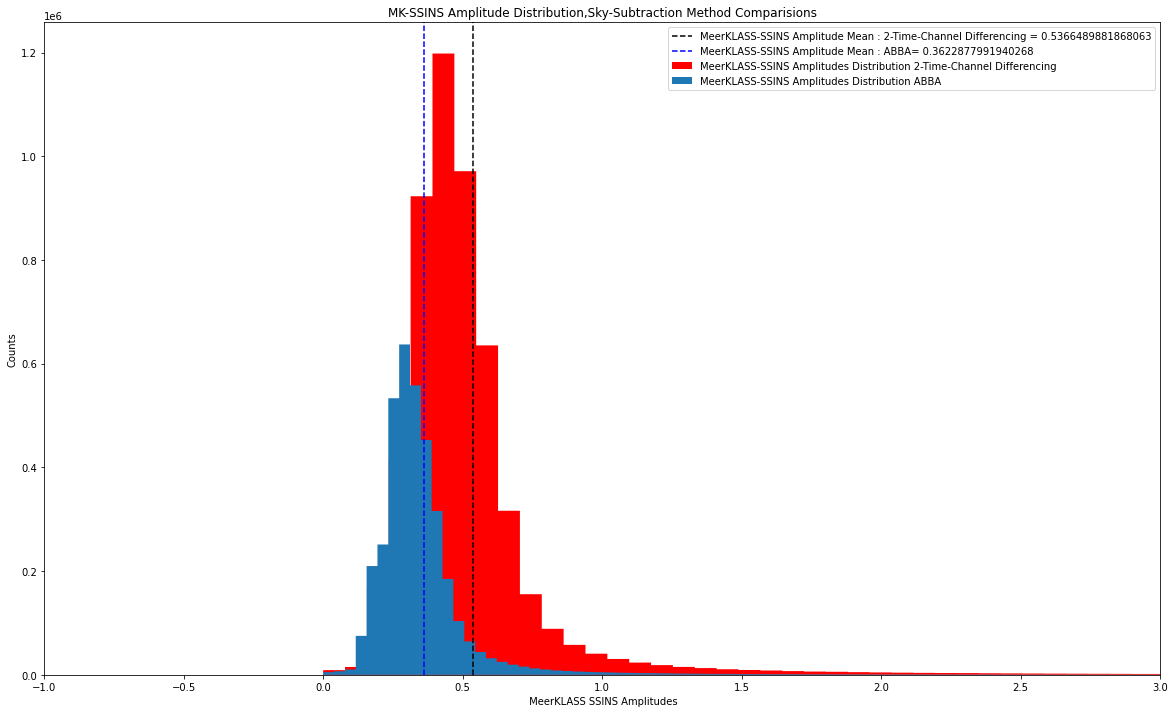

In [55]:
td_mean= np.nanmean(ss_vis_AllAntsAve)

fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(ss_vis_AllAntsAve),label= "MeerKLASS-SSINS Amplitudes Distribution 2-Time-Channel Differencing", bins=1000, xlim=(-1,3), figsize=(20,12), histtype='stepfilled',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', color= 'r', ax=ax)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='k', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : 2-Time-Channel Differencing = {td_mean}')
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_hist(np.ravel(AbbaAllAnts),label= "MeerKLASS-SSINS Amplitudes Distribution ABBA", Title=f'MK-SSINS Amplitude Distribution,Sky-Subtraction Method Comparisions', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='stepfilled',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(mean, color='b', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : ABBA= {mean}')
ax.legend()

plt.show()

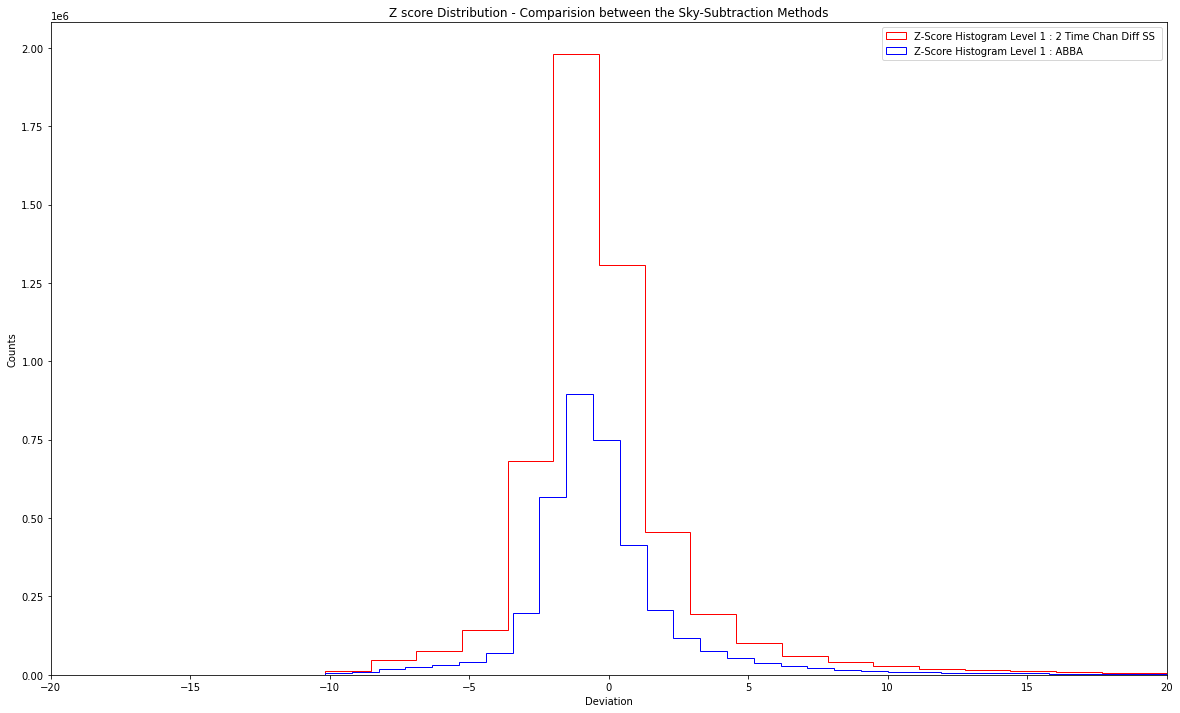

In [61]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_ss), label='Z-Score Histogram Level 1 : 2 Time Chan Diff SS ', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)

plot_hist(np.ravel(z_score_map_abba), label='Z-Score Histogram Level 1 : ABBA', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', Title= 'Z score Distribution - Comparision between the Sky-Subtraction Methods',ax=ax, edgecolor='b')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
ax.legend()
plt.show()


In [9]:
N =128
B = N*(N-1)/2
B

8128.0

In [10]:
N = 53 

## Checking the level 1 and level 4 masks
If they same or different - Because to validate what im seeing in the above example of how SSINS does iterative flagging (basic, single sample basis)